In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
dataset_train = datasets.MNIST('mnist', train=True, download = True, transform = transforms.ToTensor())
dataset_valid = datasets.MNIST('mnist', train=False, download = True, transform = transforms.ToTensor())

load_train = DataLoader(dataset_train, batch_size = 8, num_workers = 0, shuffle = True)
load_valid = DataLoader(dataset_valid, batch_size = 8, num_workers = 0, shuffle = True)


# Решение MNIST на 97.5%

In [ ]:
model = nn.Sequential(
    nn.Flatten(), # batch * 784
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 2e-4)
epochs = 10

In [ ]:
from tqdm.auto import tqdm

train_loss, valid_loss = [], []
for epoch in tqdm(range(epochs)):
    model.train()
    sum, cnt = 0, 0
    for batch in tqdm(load_train, total = len(load_train)):
        optimizer.zero_grad()
        output = model(batch[0].to(device))
        correct_answers = torch.zeros(batch[1].size(0), 10).to(device)
        for i, correct in enumerate(batch[1]):
            correct_answers[i][correct] = 1
        loss = criterion(output, correct_answers)
        sum += loss.item()
        cnt += 1
        loss.backward()
        optimizer.step()
    train_loss.append(sum / cnt)
    sum, cnt = 0, 0

    model.eval()
    for batch in tqdm(load_valid, total = len(load_valid)):
        with torch.no_grad():
           output = model(batch[0].to(device))
           correct_answers = torch.zeros(batch[1].size(0), 10).to(device)
           for i, correct in enumerate(batch[1]):
              correct_answers[i][correct] = 1
           loss = criterion(output, correct_answers)
           sum += loss.item()
           cnt += 1
    valid_loss.append(sum / cnt)

    

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

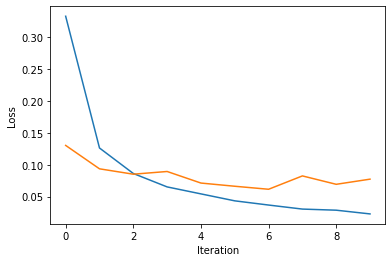

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(train_loss)
plt.plot(valid_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
model.eval()

cnt_correct, total = 0, 0
for batch in tqdm(load_valid, total = len(load_valid)):
    output = model(batch[0].to(device))
    output = output.argmax(-1)
    total += output.shape[0]
    cnt_correct += (output == batch[1].to(device)).sum().item()
print(cnt_correct / total)


  0%|          | 0/1250 [00:00<?, ?it/s]

0.981


Добавим conv слои

In [ ]:
model_conv = nn.Sequential(
    nn.Conv2d(1, 32, 5, 1, 0),
    nn.LeakyReLU(0.02),
    nn.Conv2d(32, 16, 5, 1, 0),
    nn.LeakyReLU(0.02),
    nn.MaxPool2d(5, 1, 0),
    nn.Dropout(0.2),
    nn.Flatten(),
    
    nn.Linear(4096, 256),
    nn.ReLU(),
    nn.Dropout(0.1),

    nn.Linear(256, 32),
    nn.ReLU(),
    nn.Dropout(0.1),

    nn.Linear(32, 10),
    nn.Softmax()
)

model_conv = model_conv.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_conv.parameters(), lr = 1e-4)
epochs = 10

In [ ]:
from tqdm.auto import tqdm

train_loss, valid_loss = [], []
for epoch in tqdm(range(epochs)):
    model_conv.train()
    sum, cnt = 0, 0
    for batch in load_train:
        optimizer.zero_grad()
        output = model_conv(batch[0].to(device))
        correct_answers = torch.zeros(batch[1].size(0), 10).to(device)
        for i, correct in enumerate(batch[1]):
            correct_answers[i][correct] = 1
        loss = criterion(output, correct_answers)
        sum += loss.item()
        cnt += 1
        loss.backward()
        optimizer.step()
    train_loss.append(sum / cnt)
    sum, cnt = 0, 0

    model_conv.eval()
    for batch in load_valid:
        with torch.no_grad():
           output = model_conv(batch[0].to(device))
           correct_answers = torch.zeros(batch[1].size(0), 10).to(device)
           for i, correct in enumerate(batch[1]):
              correct_answers[i][correct] = 1
           loss = criterion(output, correct_answers)
           sum += loss.item()
           cnt += 1
    valid_loss.append(sum / cnt)

    

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



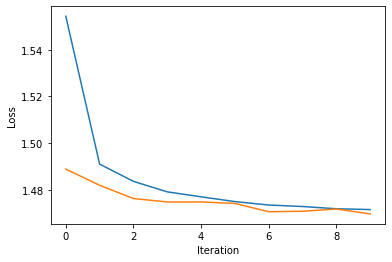

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(train_loss)
plt.plot(valid_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
model_conv.eval()

cnt_correct, total = 0, 0
for batch in tqdm(load_valid, total = len(load_valid)):
    output = model_conv(batch[0].to(device))
    output = output.argmax(-1)
    total += output.shape[0]
    cnt_correct += (output == batch[1].to(device)).sum().item()
print(cnt_correct / total)


  0%|          | 0/1250 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



0.9918


# MNIST в 2d

Сначала без conv - слоев

In [ ]:
class SimpleAutoEncoder(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(128, hidden_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(512, 784)
        )
    
    def forward(self, X):
        #flattened_X = self.flatten(X)
        latent = self.encoder(X)
        X_transformed = self.decoder(latent)
        return X_transformed, latent

In [ ]:
simple_aec = SimpleAutoEncoder(2).to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(simple_aec.parameters(), lr = 2e-4)
epochs = 10

In [ ]:
train_loss = []
simple_aec.train()
for epoch in tqdm(range(epochs)):
    for batch in load_train:
        optimizer.zero_grad()
        image = simple_aec.flatten(batch[0].to(device))
        image_transformed = simple_aec(image)[0]
        loss = criterion(image_transformed, image)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()

  0%|          | 0/10 [00:00<?, ?it/s]

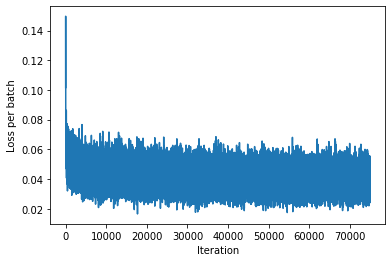

In [ ]:
plt.plot(train_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss per batch")
plt.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


In [ ]:
simple_aec.eval()

latent_codes = []
classes = []
reconstructed_images = torch.tensor([]).to(device)
original_images = torch.tensor([]).to(device)
for batch in tqdm(load_valid, total = len(load_valid)):
    with torch.no_grad():
        image = simple_aec.flatten(batch[0].to(device))
        result_images, latent_code = simple_aec(image)
        for num in batch[1]:
            classes.append(num.item())
        for i in range(batch[1].size(0)):
            latent_codes.append(latent_code[i].cpu().numpy())
        reconstructed_images = torch.cat((reconstructed_images, result_images))
        original_images = torch.cat((original_images, image))

  0%|          | 0/1250 [00:00<?, ?it/s]

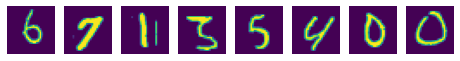

In [ ]:
plt.figure(figsize = (8, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(original_images[i].reshape((28, 28)).cpu().numpy())

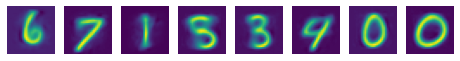

In [ ]:
plt.figure(figsize = (8, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(reconstructed_images[i].reshape((28, 28)).cpu().numpy())

Нарисуем точки

plotly

In [ ]:
fig = px.scatter(x = [val[0] for val in latent_codes],
                 y = [val[1] for val in latent_codes], 
                 color = classes)
fig.show(renderer = 'colab')

matplotlib

No handles with labels found to put in legend.


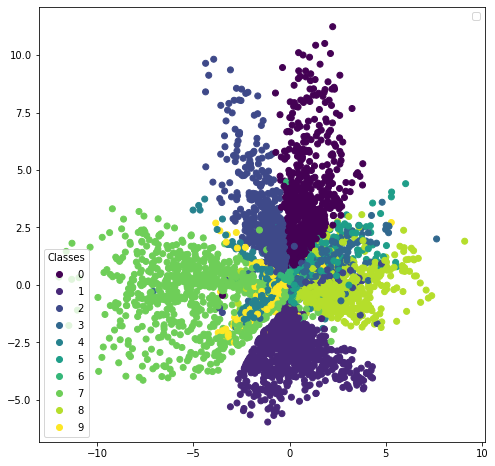

In [ ]:
fig, ax = plt.subplots()

scat = ax.scatter([val[0] for val in latent_codes], [val[1] for val in latent_codes], c = classes)
legend1 = ax.legend(*scat.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

fig.set_figwidth(8)
fig.set_figheight(8)
ax.legend()
plt.show()   

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(latent_codes, classes))

-0.015309952


автоэнкодер с conv слоями

In [30]:
class AutoEncoder(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.02),
            nn.Conv2d(32, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.02),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.02),
            nn.Conv2d(64, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.02),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 8, 3, 1, 1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(8 * 7 * 7, 32),
            nn.ReLU(),
            nn.Linear(32, hidden_dim)
        )

        self.dec1 = nn.Sequential(
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 8 * 7 * 7),   
            nn.ReLU(),
        )

        self.dec = nn.Sequential(
            nn.ConvTranspose2d(8, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Upsample(scale_factor = 2.0, mode = 'nearest'),
            nn.ConvTranspose2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Upsample(scale_factor = 2.0, mode = 'nearest'),
            nn.ConvTranspose2d(128, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, 1, 1),

        )

    def encoder(self, X):
        latent = self.enc(X)
        return latent

    def decoder(self, latent):
        output = self.dec1(latent).view(-1, 8, 7, 7)
        output = self.dec(output)
        return output

    def forward(self, X):
        latent = self.encoder(X)
        output = self.decoder(latent)
        return output, latent

model_aec = AutoEncoder(2).to(device)

In [31]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model_aec.parameters(), lr = 7e-4)
epochs = 12

  0%|          | 0/12 [00:00<?, ?it/s]

train loss per epoch 1 : 0.1077252371052901


  0%|          | 0/1250 [00:00<?, ?it/s]

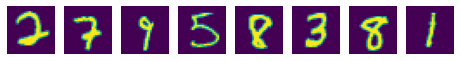

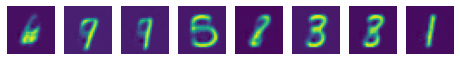

No handles with labels found to put in legend.


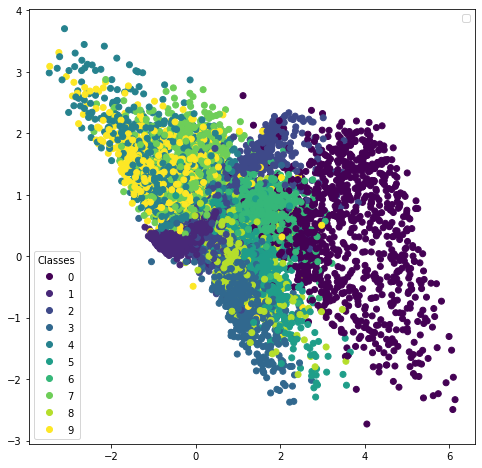

train loss per epoch 2 : 0.08813415325482686


  0%|          | 0/1250 [00:00<?, ?it/s]

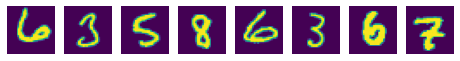

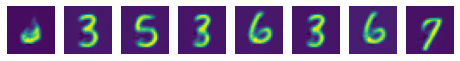

No handles with labels found to put in legend.


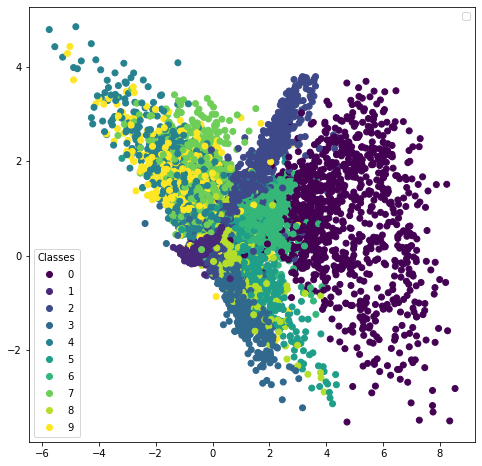

train loss per epoch 3 : 0.08321606642405192


  0%|          | 0/1250 [00:00<?, ?it/s]

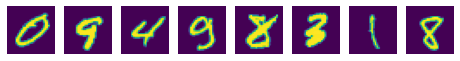

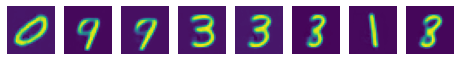

No handles with labels found to put in legend.


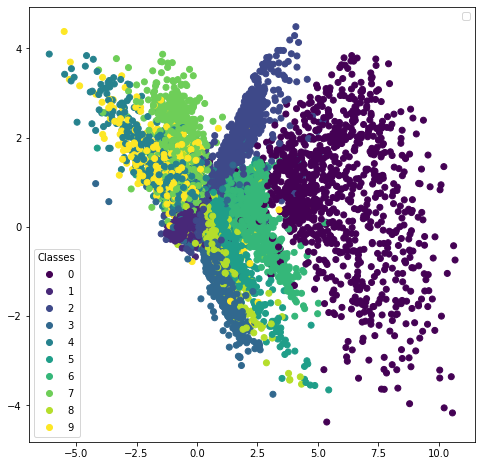

train loss per epoch 4 : 0.08043841462333998


  0%|          | 0/1250 [00:00<?, ?it/s]

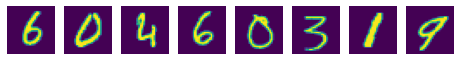

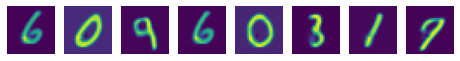

No handles with labels found to put in legend.


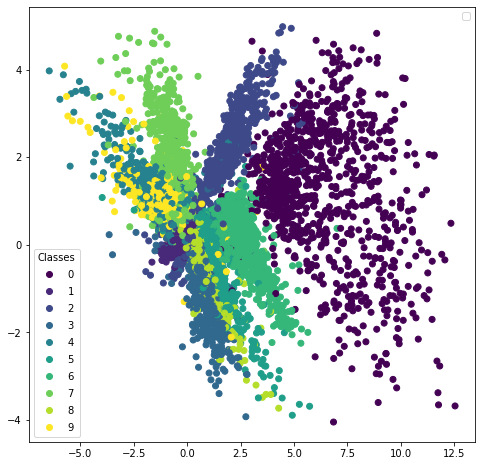

train loss per epoch 5 : 0.07881674149235089


  0%|          | 0/1250 [00:00<?, ?it/s]

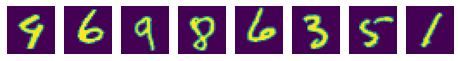

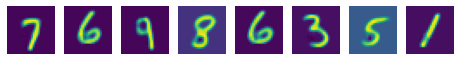

No handles with labels found to put in legend.


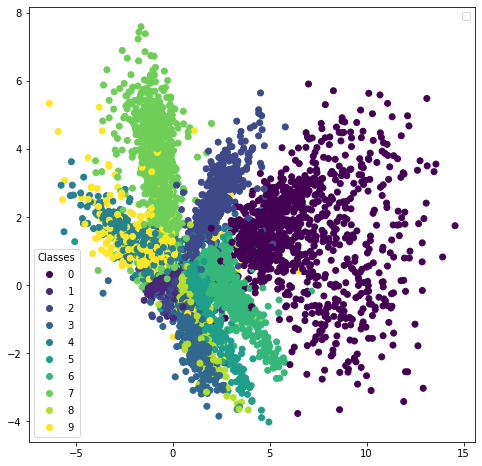

train loss per epoch 6 : 0.0775931453704834


  0%|          | 0/1250 [00:00<?, ?it/s]

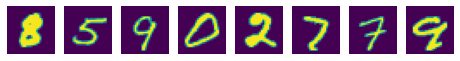

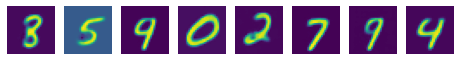

No handles with labels found to put in legend.


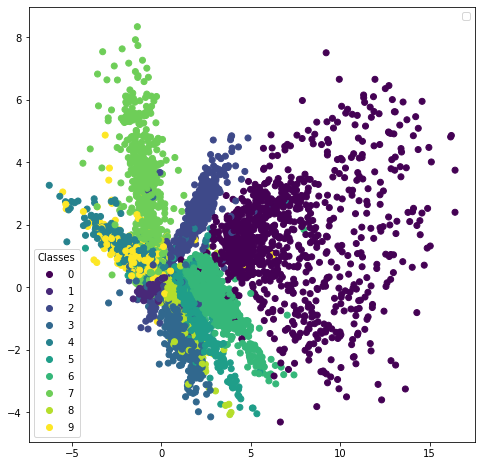

train loss per epoch 7 : 0.07663981722791989


  0%|          | 0/1250 [00:00<?, ?it/s]

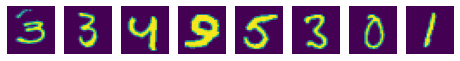

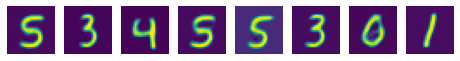

No handles with labels found to put in legend.


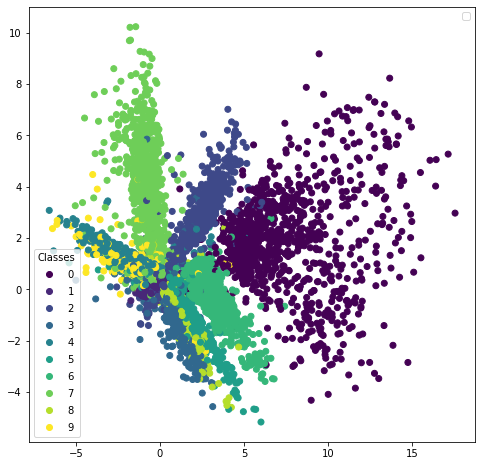

train loss per epoch 8 : 0.07594065488080183


  0%|          | 0/1250 [00:00<?, ?it/s]

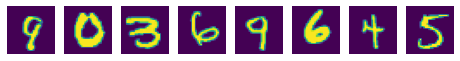

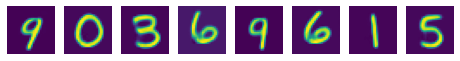

No handles with labels found to put in legend.


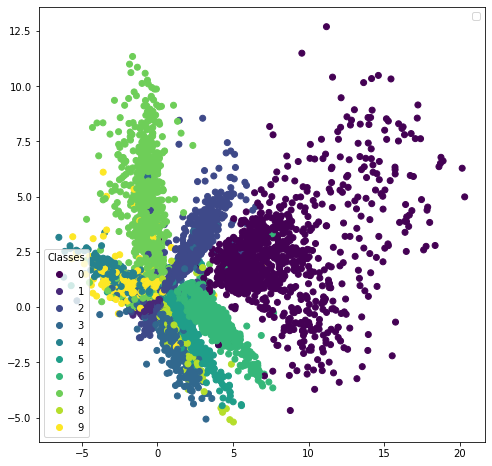

train loss per epoch 9 : 0.0753118930225571


  0%|          | 0/1250 [00:00<?, ?it/s]

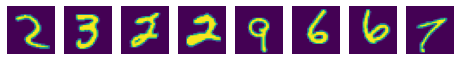

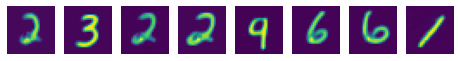

No handles with labels found to put in legend.


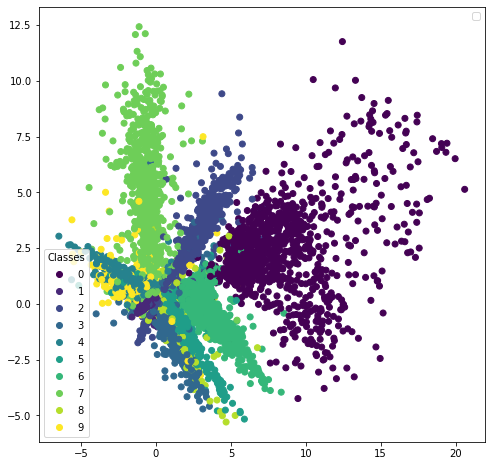

train loss per epoch 10 : 0.07487552864998578


  0%|          | 0/1250 [00:00<?, ?it/s]

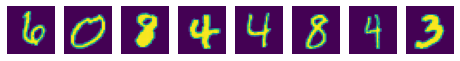

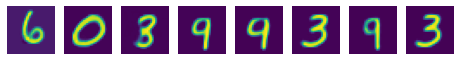

No handles with labels found to put in legend.


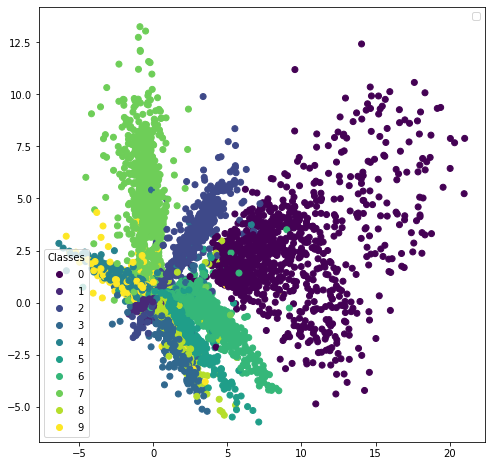

train loss per epoch 11 : 0.07479713932822148


  0%|          | 0/1250 [00:00<?, ?it/s]

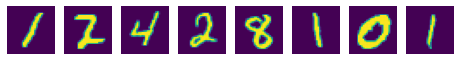

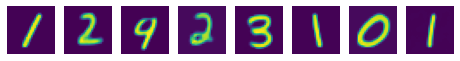

No handles with labels found to put in legend.


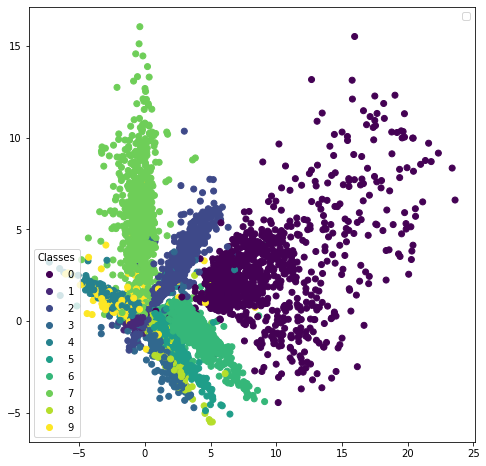

train loss per epoch 12 : 0.07431553806414207


  0%|          | 0/1250 [00:00<?, ?it/s]

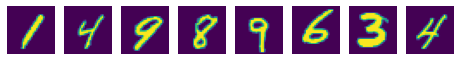

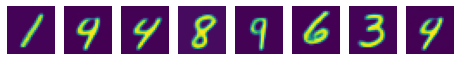

No handles with labels found to put in legend.


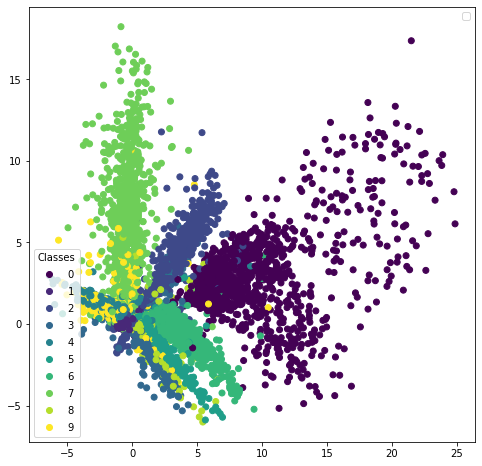

In [32]:
from tqdm.auto import tqdm

train_loss = []
for epoch in tqdm(range(epochs)):
    model_aec.train()
    sum_loss = 0
    cnt_loss = 0
    for batch in load_train:
        optimizer.zero_grad()
        image = batch[0].to(device)
        image_transformed = model_aec(image)[0]
        loss = criterion(image_transformed, image)
        sum_loss += loss.item()
        cnt_loss += 1
        loss.backward()
        
        #torch.nn.utils.clip_grad_norm(model_aec.parameters(), 1.0)
        optimizer.step()
    print(f'train loss per epoch {epoch + 1} : {sum_loss / cnt_loss}')
    train_loss.append(sum_loss / cnt_loss)

    model_aec.eval()

    latent_codes = []
    classes = []
    reconstructed_images = torch.tensor([]).to(device)
    original_images = torch.tensor([]).to(device)
    for batch in tqdm(load_valid, total = len(load_valid)):
        with torch.no_grad():
            image = batch[0].to(device)
            result_images, latent_code = model_aec(image)
            for num in batch[1]:
                classes.append(num.item())
            for i in range(batch[1].size(0)):
                latent_codes.append(latent_code[i].cpu().numpy())
            reconstructed_images = torch.cat((reconstructed_images, result_images))
            original_images = torch.cat((original_images, image))
    plt.figure(figsize = (8, 8))
    for i in range(8):
        plt.subplot(1, 8, i + 1)
        plt.axis('off')
        plt.imshow(original_images[i].reshape((28, 28)).cpu().numpy())
    plt.show()

    plt.figure(figsize = (8, 8))
    for i in range(8):
        plt.subplot(1, 8, i + 1)
        plt.axis('off')
        plt.imshow(reconstructed_images[i].reshape((28, 28)).cpu().numpy())
    plt.show()

    fig, ax = plt.subplots()

    scat = ax.scatter([val[0] for val in latent_codes], [val[1] for val in latent_codes], c = classes)
    legend1 = ax.legend(*scat.legend_elements(),
                    loc="lower left", title="Classes")
    ax.add_artist(legend1)

    fig.set_figwidth(8)
    fig.set_figheight(8)
    ax.legend()
    plt.show()   

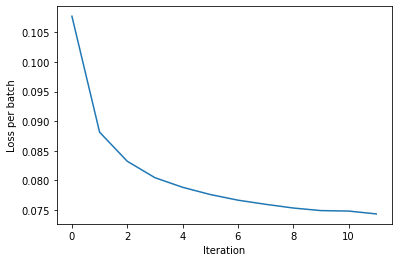

In [33]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss per batch")
plt.show()

In [34]:
model_aec.eval()

latent_codes = []
classes = []
reconstructed_images = torch.tensor([]).to(device)
original_images = torch.tensor([]).to(device)
for batch in tqdm(load_valid, total = len(load_valid)):
    with torch.no_grad():
        image = batch[0].to(device)
        result_images, latent_code = model_aec(image)
        for num in batch[1]:
            classes.append(num.item())
        for i in range(batch[1].size(0)):
            latent_codes.append(latent_code[i].cpu().numpy())
        reconstructed_images = torch.cat((reconstructed_images, result_images))
        original_images = torch.cat((original_images, image))

  0%|          | 0/1250 [00:00<?, ?it/s]

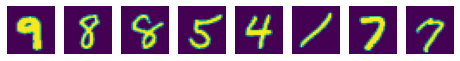

In [35]:
plt.figure(figsize = (8, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(original_images[i].reshape((28, 28)).cpu().numpy())

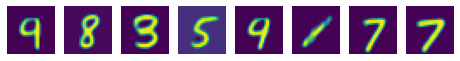

In [36]:
plt.figure(figsize = (8, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(reconstructed_images[i].reshape((28, 28)).cpu().numpy())

No handles with labels found to put in legend.


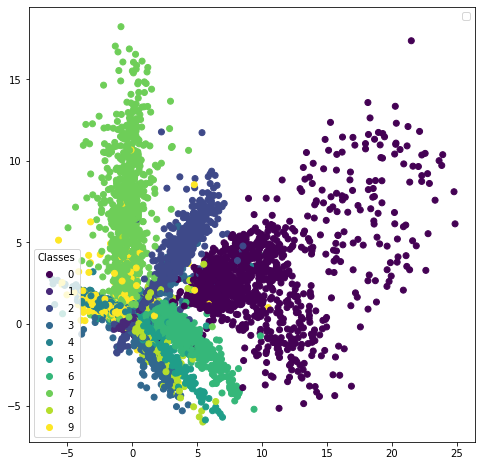

In [37]:
fig, ax = plt.subplots()

scat = ax.scatter([val[0] for val in latent_codes], [val[1] for val in latent_codes], c = classes)
legend1 = ax.legend(*scat.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

fig.set_figwidth(8)
fig.set_figheight(8)
ax.legend()
plt.show()   

In [38]:

from sklearn.metrics import silhouette_score


print(silhouette_score(latent_codes, classes))

0.05453387


У сверточного автоэнкодера значение силуэта получается больше

Попробуем улучшить размер скрытого пространства и посмотрим как он восстанавливает картинки

In [39]:
model_advanced = AutoEncoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_advanced.parameters(), lr = 2e-4)
epochs = 10

from tqdm.auto import tqdm

train_loss = []
model_advanced.train()
for epoch in tqdm(range(epochs)):
    for batch in load_train:
        optimizer.zero_grad()
        image = batch[0].to(device)
        image_transformed = model_advanced(image)[0]
        loss = criterion(image_transformed, image)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()

  0%|          | 0/10 [00:00<?, ?it/s]

In [40]:
model_advanced.eval()

latent_codes = []
classes = []
reconstructed_images = torch.tensor([]).to(device)
original_images = torch.tensor([]).to(device)
for batch in tqdm(load_valid, total = len(load_valid)):
    with torch.no_grad():
        image = batch[0].to(device)
        result_images, latent_code = model_advanced(image)
        for num in batch[1]:
            classes.append(num.item())
        for i in range(batch[1].size(0)):
            latent_codes.append(latent_code[i].cpu().numpy())
        reconstructed_images = torch.cat((reconstructed_images, result_images))
        original_images = torch.cat((original_images, image))

  0%|          | 0/1250 [00:00<?, ?it/s]

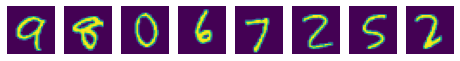

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(original_images[i].reshape((28, 28)).cpu().numpy())

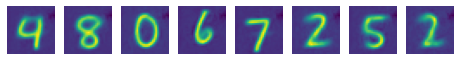

In [42]:
plt.figure(figsize = (8, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(reconstructed_images[i].reshape((28, 28)).cpu().numpy())

MNIST в 3d

In [43]:
import plotly.express as px

fig = px.scatter_3d(x = [val[0] for val in latent_codes],
                    y = [val[1] for val in latent_codes],
                    z = [val[2] for val in latent_codes],
                    color = classes)
fig.show(renderer = 'colab')

# Gif

In [ ]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import numpy as np

In [ ]:
def get(x):
    return load_train.dataset[x][0].view(1, 784)

def imshow(img):
    pic = img.cpu().numpy().astype('float')
    plt.axis('off')
    return plt.imshow(pic, cmap='Greys', animated=True)

def morph(model, inputs, steps, delay):
    latent = [model.encoder(get(k).to(device)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in np.linspace(0, 1, steps):
            c = a*(1-t)+b*t
            morphed = model.decoder(c.to(device)).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    ani = animation.ArtistAnimation(fig, images, interval=delay)
    display(HTML(ani.to_html5_video()))

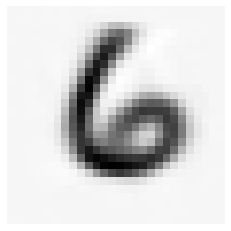

In [ ]:
morph(simple_aec, np.random.randint(0, len(load_train.dataset), 30), 20, 30)

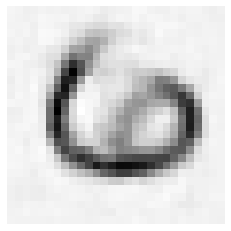

In [ ]:
def morph_conv(model, inputs, steps, delay):
    latent = [model.encoder(get(k).reshape((1, 1, 28, 28)).to(device)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in np.linspace(0, 1, steps):
            c = a*(1-t)+b*t
            morphed = model.decoder(c.to(device)).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    ani = animation.ArtistAnimation(fig, images, interval=delay)
    display(HTML(ani.to_html5_video()))

morph_conv(model_aec, np.random.randint(0, len(load_train.dataset), 30), 20, 30)